In [95]:
import numpy as np
from astropy.io import fits
from astropy import units as u
from astropy import coordinates as coord
from astropy.coordinates import ICRS, Galactic, FK4, FK5
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from matplotlib.patches import Rectangle
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from BootstrapCorrelation import korr, korr2
from astropy.io import ascii

In [27]:
filename1 = '../DS9/rxj1713_suz_0.5res.fits'
hdu1 = fits.open(filename1)
suzaku_data = hdu1[0].data

filename2 = '../DS9/rxj1713_mopHI_05res.fits'
hdu2 = fits.open(filename2)
Np_mop_data = hdu2[0].data

In [109]:
# x1 = Np_mop_data[64,127:130].flatten()
# x2 = Np_mop_data[65,124:133].flatten()
# x3 = Np_mop_data[66,125:132].flatten()
x4 = Np_mop_data[67,124:133].flatten()
x5 = Np_mop_data[68,124:133].flatten()
x6 = Np_mop_data[69,124:133].flatten()
x7 = Np_mop_data[70,124:134].flatten()
x8 = Np_mop_data[71,124:134].flatten()
x9 = Np_mop_data[72,124:134].flatten()
# x10 = Np_mop_data[73,125:132].flatten()
# x11 = Np_mop_data[74,124:133].flatten()
# x12 = Np_mop_data[75,127:130].flatten()
x = np.hstack((x4,x5,x6,x7,x8,x9))

# y1 = suzaku_data[64,127:130].flatten()
# y2 = suzaku_data[65,124:133].flatten()
# y3 = suzaku_data[66,125:132].flatten()
y4 = suzaku_data[67,124:133].flatten()
y5 = suzaku_data[68,124:133].flatten()
y6 = suzaku_data[69,124:133].flatten()
y7 = suzaku_data[70,124:134].flatten()
y8 = suzaku_data[71,124:134].flatten()
y9 = suzaku_data[72,124:134].flatten()
# y10 = suzaku_data[73,125:132].flatten()
# y11 = suzaku_data[74,124:133].flatten()
# y12 = suzaku_data[75,127:130].flatten()
y = np.hstack((y4,y5,y6,y7,y8,y9))

------------------
Actual value -0.29686043
Spearman value -0.2869830379264341
Extreme value (3 sigma uncertainty) -0.46038050781349116 0.1717463921977318
3 sigma 0.4000313709561798
5 sigma 0.5086740465891674


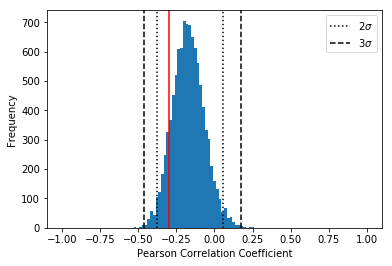

In [124]:
# Obtain data points corresponding to core C

y1 = suzaku_data[71:74,125:134].flatten()
y2 = suzaku_data[68:71,124:133].flatten()
y = np.hstack((y1,y2))
y = y.flatten()
x1 = Np_mop_data[71:74,125:134].flatten()
x2 = Np_mop_data[68:71,124:133].flatten()
x = np.hstack((x1,x2))
x = x.flatten()

#calculate the error for the individual suzaku data and the gas data
# Trms might need updating for mopra
y_error = 0.4*y/np.sqrt(4.0)
x_error = np.ones(len(x)) * (2. * 2.e20 * 2.8**0.5 / 100**0.5 * 0.7 * (20.0/0.11)**0.5 + 1.9 * (20.0/0.82)**0.5 * 1.828e18 * 2.8**0.5)

k = []
kk = []
for i in range(10000):
    k.append(korr(x,y,x_error,y_error))
    kk.append(korr2(np.mean(x/1.e21), np.std(x/1.e21), np.mean(y), np.std(y), len(x)))
    
print('------------------')
print('Actual value', pearsonr(x/1.e21,y)[0])
print('Spearman value', spearmanr(x/1.e21,y)[0])
print('Extreme value (3 sigma uncertainty)', np.percentile(k, (100-99.73)/2.0), np.percentile(k, 100 - (100 - 99.73)/2.0))
print('3 sigma', np.percentile(np.abs(kk), 99.73))
print('5 sigma', np.percentile(np.abs(kk), 99.99994))
plt.hist(k, bins=111, range=[-1,1])
#     plt.axvline(np.percentile(k[i], (100-68.26)/2.0), color ='k', ls='--', label = '1$\sigma$')
#     plt.axvline(np.percentile(k[i], 100 - (100-68.26)/2.0), color ='k', ls='--')
plt.axvline(np.percentile(k, (100-95.45)/2.0), color ='k', ls=':', label = '2$\sigma$')
plt.axvline(np.percentile(k, 100 - (100-95.45)/2.0), color ='k', ls=':')
plt.axvline(np.percentile(k, (100-99.73)/2.0), color ='k', ls='--', label = '3$\sigma$')
plt.axvline(np.percentile(k, 100 - (100-99.73)/2.0), color ='k', ls='--')
plt.axvline(pearsonr(x/1.e21,y)[0], color = 'red', ls = "-")
plt.legend(loc='best')
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Frequency")
plt.show()

